In [ ]:
#1
1. Decision Function:This defines the hyperplane that separates the data points. It's based on the dot product between a weight vector w and the data point x, along with a bias term b.
w: This is a weight vector with the same dimensionality as your data points. It represents the direction along which the hyperplane is most sensitive to changes in the data.
x: This represents a data point in your dataset.
b: This is the bias term that helps shift the hyperplane to accommodate the data distribution.
Here's the formula for the decision function:

f(x) = w^T * x + b

In [ ]:
#2
Maximizing Margin: The margin refers to the distance between the hyperplane and the closest data points from each class, also called support vectors. The objective function prioritizes creating a hyperplane with the largest possible margin.
since simply maximizing the margin might not be ideal for all cases. Here's why:
Handling Errors (Soft Margin): The objective function often incorporates a term that penalizes misclassified points. This allows for some flexibility in handling errors during training, especially when dealing with real-world datasets that may not be perfectly separable. This term is controlled by a hyperparameter called "C" which determines the trade-off between maximizing the margin and allowing for some misclassifications.

In [ ]:
#3
Linear SVMs for Linear Data: Standard SVMs work well when data is linearly separable in the original feature space. This means a straight line (in 2D) or hyperplane (in higher dimensions) can perfectly divide the data points belonging to different classes.

Non-Linear Data Challenges: Real-world data often isn't linearly separable. Imagine data points for apples and oranges scattered in a way that a straight line can't cleanly classify them.

Mapping to Higher Dimensions: The kernel trick addresses this by implicitly mapping the data points from the original space to a higher-dimensional feature space. In this higher-dimensional space, the data may become linearly separable, allowing the SVM to find a separating hyperplane.

Here's the beauty of the kernel trick:

Computational Efficiency:  While the mapping to a higher-dimensional space might sound complex, the kernel trick avoids explicitly performing this mapping. Instead, it uses a kernel function, which is a mathematical trick that operates on the data points in the original space. The kernel function essentially calculates the dot product of the data points in the higher-dimensional space, without requiring us to know the exact coordinates in that space. This keeps the computations efficient and avoids the "curse of dimensionality" where computations become expensive in high dimensions.

Variety of Kernels: There are different types of kernel functions, each inducing a different kind of mapping to the higher-dimensional space. Common choices include linear (useful for comparison with linear SVM), polynomial, and radial basis function (RBF) kernels. Selecting the right kernel function can significantly impact the performance of the SVM on your specific data.

In [ ]:
#4
Role of Support Vectors:
Defining the Hyperplane: Imagine you have a dataset of emails classified as spam or not spam. The SVM algorithm aims to find a decision boundary (hyperplane) that best separates these emails. The support vectors are the data points closest to this hyperplane, one from each class. These points have the greatest influence on the position of the hyperplane.
Maximizing the Margin:  The SVM strives to create a hyperplane with the maximum margin. The margin refers to the distance between the hyperplane and the closest support vectors from both classes. A larger margin translates to a more robust decision boundary, less prone to errors on new unseen data.

Example:
Consider a simplified scenario where you want to classify emails based on word frequency of "buy" and "sell." Emails with a higher "buy" frequency and lower "sell" frequency are classified as "buy signal," and vice versa for "sell signal."
Data Points: Imagine two data points, one with (3 "buy", 1 "sell") and another with (1 "buy", 4 "sell"). These points represent emails in the two classes.
Support Vectors:  The SVM algorithm identifies these two data points as the support vectors because they are closest to the possible hyperplane separating the "buy signal" and "sell signal" classes.
Hyperplane and Margin: The SVM will position the hyperplane in a way that maximizes the margin between these support vectors. This margin determines the decision boundary for classifying new emails.

Impact of Support Vectors:If the support vectors are well-chosen, the resulting hyperplane will effectively separate the data and provide good classification accuracy.



In [ ]:
#5
Data & Classes: imagine a 2D dataset where data points represent emails classified as "spam" (red) and "not spam" (blue). Our goal is to find a hyperplane that effectively separates these classes.

Hyperplane:A hyperplane in SVM is a decision boundary, typically a line in 2D or a plane in higher dimensions. It separates the data points belonging to different classes.
    
Margin:The margin refers to the distance between the hyperplane and the closest data points from each class. These closest data points are called support vectors (we'll discuss them later). A larger margin generally translates to a more robust decision boundary, less prone to errors on unseen data.

Marginal Plane (Not SVM Specific):It's important to clarify that the term "marginal plane" isn't commonly used specifically in SVM. The margin itself refers to the distance, not a specific plane.

Hard Margin:A hard margin SVM aims to find a hyperplane that perfectly separates the data points of the two classes with the maximum margin. In other words, there are no data points lying on the wrong side of the hyperplane, and no data points exactly on the hyperplane itself (except for the support vectors).

Accuracy: 1.00


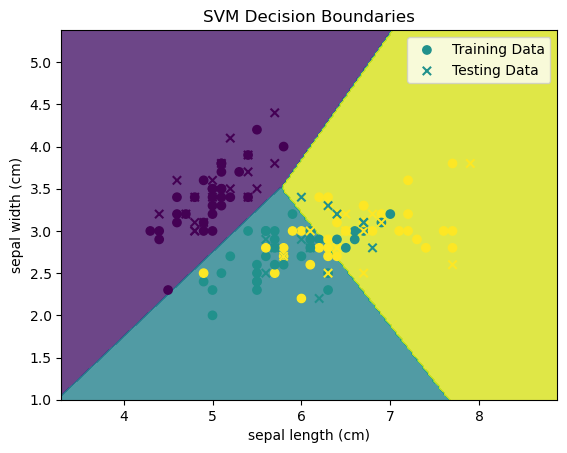

C: 0.01 - Accuracy: 0.98
C: 0.1 - Accuracy: 1.00
C: 1 - Accuracy: 1.00
C: 10 - Accuracy: 0.98
C: 100 - Accuracy: 1.00


In [1]:
#6
from sklearn import datasets
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()
X = iris.data  
y = iris.target  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
import numpy as np
import matplotlib.pyplot as plt
X_vis = X[:, :2]
X_train_vis = X_train[:, :2]
X_test_vis = X_test[:, :2]
svm_vis = SVC(kernel='linear', C=1.0)
svm_vis.fit(X_train_vis, y_train)
h = .02 
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train, marker='o', label='Training Data')
plt.scatter(X_test_vis[:, 0], X_test_vis[:, 1], c=y_test, marker='x', label='Testing Data')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.title('SVM Decision Boundaries')
plt.show()
C_values = [0.01, 0.1, 1, 10, 100]
for C in C_values:
    svm = SVC(kernel='linear', C=C)
    svm.fit(X_train, y_train)
    
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'C: {C} - Accuracy: {accuracy:.2f}')

